In [185]:
import cv2
import numpy as np
import pandas as pd
import os
import random
import gc

In [186]:
import matplotlib.pyplot as plt

In [187]:
%matplotlib inline

In [188]:
train_dir = os.path.join(os.getcwd(), 'Train')
test_dir = os.path.join(os.getcwd(), 'Test')

In [189]:
train_1 = [os.path.join(train_dir, i) for i in os.listdir(train_dir) if 'Stain' in i]
train_2 = [os.path.join(train_dir, i) for i in os.listdir(train_dir) if 'thread' in i]

In [256]:
test_1 = [os.path.join(test_dir, i) for i in os.listdir(test_dir)]

In [191]:
train_images = train_1 + train_2
random.shuffle(train_images)

In [192]:
del train_1
del train_2
gc.collect()

47853

In [233]:
nrows = 150
ncolumns = 150
channels = 1

def process(imageList):
    x, y = [], []

    for image in imageList:
        x.append(cv2.resize(cv2.imread(image), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC))
        if 'Stain' in image:
            y.append(0)
        elif 'thread' in image:
            y.append(1)  
    return x, y

In [234]:
x, y = process(train_images)
len(x) - len(y)

0

In [235]:
X, y = process(train_images)

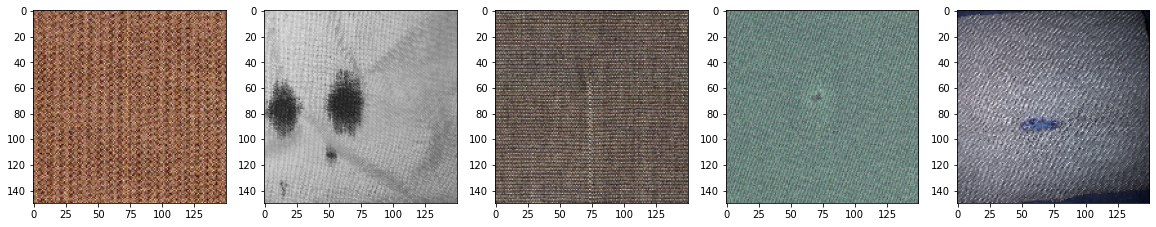

In [236]:
plt.figure(figsize=(20, 10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns+1, columns, i+1)
    plt.imshow(X[i])

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

In [239]:
X_train  = np.array(X_train)
X_val  = np.array(X_val)
y_train  = np.array(y_train)
y_val  = np.array(y_val)

In [240]:
del X


In [241]:
del y
gc.collect()

13612

In [242]:
ntrain = len(X_train)
nval = len(X_val)

batch_size = 2

In [243]:
from keras import layers, models, optimizers

In [244]:
from keras.preprocessing.image import ImageDataGenerator

In [245]:
from keras.preprocessing.image import img_to_array, load_img

In [246]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

In [247]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 15, 15, 128)     

In [248]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [249]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )
val_datagen = ImageDataGenerator(rescale=1./255)

In [250]:
len(X_val)

6

In [251]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [252]:
history = model.fit_generator(train_generator, 
                             steps_per_epoch = ntrain//batch_size,
                             epochs = 64,
                             validation_data = val_generator,
                              validation_steps = nval//batch_size
                             )

Epoch 1/64
11/11 [==============================] - 4s 166ms/step - loss: 0.7202 - acc: 0.3669 - val_loss: 0.6695 - val_acc: 0.5000
Epoch 2/64
11/11 [==============================] - 1s 137ms/step - loss: 0.7248 - acc: 0.5276 - val_loss: 0.6579 - val_acc: 0.5000
Epoch 3/64
11/11 [==============================] - 1s 131ms/step - loss: 0.6766 - acc: 0.5319 - val_loss: 0.6115 - val_acc: 0.5000
Epoch 4/64
11/11 [==============================] - 1s 135ms/step - loss: 0.6391 - acc: 0.4204 - val_loss: 0.5996 - val_acc: 0.5000
Epoch 5/64
11/11 [==============================] - 2s 137ms/step - loss: 0.7012 - acc: 0.5141 - val_loss: 0.5022 - val_acc: 0.5000
Epoch 6/64
11/11 [==============================] - 1s 130ms/step - loss: 0.7033 - acc: 0.5572 - val_loss: 0.4914 - val_acc: 0.5000
Epoch 7/64
11/11 [==============================] - 2s 140ms/step - loss: 0.5657 - acc: 0.4326 - val_loss: 0.6111 - val_acc: 0.5000
Epoch 8/64
11/11 [==============================] - 1s 130ms/step - loss: 0.

11/11 [==============================] - 2s 138ms/step - loss: 0.1347 - acc: 0.5524 - val_loss: 0.0185 - val_acc: 0.5000
Epoch 63/64
11/11 [==============================] - 1s 134ms/step - loss: 0.4828 - acc: 0.4487 - val_loss: 0.1511 - val_acc: 0.5000
Epoch 64/64
11/11 [==============================] - 1s 132ms/step - loss: 0.1033 - acc: 0.3844 - val_loss: 0.0369 - val_acc: 0.5000


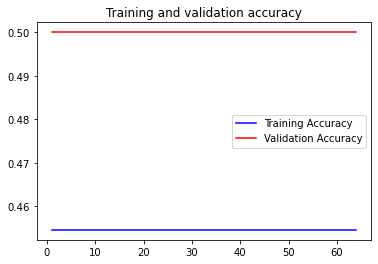

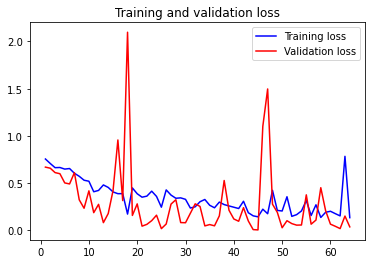

In [254]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [255]:
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

In [258]:
X_test, y_test = process(test_1)
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
text_labels = []
# plt.figure(figsize = (30, 20))

for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    print(pred)
    if pred > 0.5:
        text_labels.append('Stain')
    else:
        text_labels.append('Thread')
#     plt.subplot(5/columns+1, columns, i+1)
#     plt.title(text_labels[i])
#     imgplot = plt.imshow(batch[0])
    i+=1
    if i%10 == 0:
        break
# plt.show()

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]


In [259]:
text_labels

['Stain',
 'Stain',
 'Stain',
 'Stain',
 'Stain',
 'Stain',
 'Stain',
 'Stain',
 'Stain',
 'Stain']